## 6. Logistic Model

Simple Logistic Regression, developed by David Cox in 1958, is a regression method that allows us to estimate the probability of a binary qualitative variable as a function of a quantitative variable. One of the main applications of logistic regression is binary classification, in which observations are classified into one group or another depending on the value taken by the variable used as a predictor.  In our case, to estimate if a client is going to pay us the loan or not.

In [4]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from scipy import stats as sts # normality test JB
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV # Ridge
from sklearn.linear_model import Lasso, LassoCV # Lasso
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import r2_score # R^2
from sklearn.model_selection import train_test_split # split data
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error # MSE
from sklearn.preprocessing import StandardScaler # estandarization
from sklearn import preprocessing # estandarization
from sklearn.ensemble import IsolationForest # outliers
from math import sqrt # sqrt
import itertools # aplanar arrays
import math
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC # SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve # ROC Curve
from sklearn.datasets import make_classification
import random
random.seed(12345)
from sklearn.impute import KNNImputer

We load the final data after cleaning them.

In [6]:
data1 = pd.read_csv('../data/modeldata.csv')
data = data1.drop('Unnamed: 0',1)
data

,application_type_Joint App,"('installment',)",term_ 60 months,"('dti',)","('fico_range_low',)","('acc_now_delinq',)","('num_rev_accts',)","('num_il_tl',)","('mo_sin_old_rev_tl_op',)","('num_sats',)",...,"('total_il_high_credit_limit',)","('int_rate',)","('total_acc',)","('loan_amnt',)",home_ownership_RENT,home_ownership_OWN,home_ownership_MORTAGE&OTHER,"('last_fico_range_high',)","('tot_cur_bal',)",paid
0,0,-0.066182,0,-0.076735,1.000000,0.0,1.8,0.625,0.982143,1.500000,...,2.167452,-0.9024,1.3750,-0.085417,0,1,0,0.318182,2.045887,0
1,0,-0.293676,0,-0.968163,0.000000,0.0,-1.1,-0.750,0.062500,-1.166667,...,-0.674537,1.8976,-1.1875,-0.450000,1,0,0,-0.181818,-0.416741,0
2,0,-0.457306,0,-0.392653,0.714286,0.0,0.1,0.125,-1.017857,1.333333,...,0.013921,-0.9024,0.1875,-0.425000,0,0,1,0.272727,1.109212,0
3,0,-0.424834,1,-0.638367,0.142857,0.0,0.3,-0.375,-0.991071,0.666667,...,-0.637968,0.4848,-0.1875,-0.216667,1,0,0,-0.272727,-0.386501,0
4,0,0.345384,0,-0.577143,0.000000,0.0,-0.8,-0.500,-0.607143,-1.166667,...,-0.032839,0.4848,-0.8750,0.116667,0,0,1,-0.045455,0.270862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462221,0,0.074068,0,0.746939,-0.142857,0.0,-0.1,-0.250,0.169643,-0.333333,...,-0.729001,0.4160,-0.3750,-0.085417,1,0,0,0.045455,-0.336689,0
462222,0,0.055234,0,0.470204,0.000000,0.0,0.6,4.125,0.607143,0.333333,...,1.620201,-0.1600,2.3125,-0.050000,0,0,1,-0.545455,0.886921,1
462223,0,-0.199753,1,1.058776,-0.142857,0.0,-0.4,0.625,-0.508929,-0.333333,...,0.038300,0.4800,-0.1250,0.033333,1,0,0,-1.090909,-0.255680,1
462224,0,-0.194217,1,0.755918,0.285714,0.0,0.2,-0.500,-0.732143,1.000000,...,0.932547,1.1200,-0.2500,-0.050000,1,0,0,-1.727273,-0.119125,1


Our "paid" variable (which take value 0 if the clients comply with the payments, and 1 if the clients have been delayed at some time) is selected as an endogenous variable.

In [7]:
endogena = ['paid'] 


exogenas = list(set(list(data.columns))-set(endogena))

X = data[exogenas].values
Y = data[endogena].values

To make the models we have divided the dataset in two parts: "train" and "test" and also as the dataset is unbalanced, we have added the function "SMOTE" in order to fix this problem.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
sm = SMOTE(random_state=40, sampling_strategy = 0.4)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print(X_train.shape); print(X_test.shape)

(386909, 22)
(92446, 22)


In [12]:
ytrain_df = pd.DataFrame(Y_train, columns = ['paid'])
ytest_df = pd.DataFrame(Y_test, columns = ['paid'])

In [13]:
ytrain_df['paid'].value_counts(normalize=True)

0    0.714287
1    0.285713
Name: paid, dtype: float64

In [14]:
ytest_df['paid'].value_counts(normalize=True)

0    0.74755
1    0.25245
Name: paid, dtype: float64

In [15]:
%%time
logit_loan = LogisticRegression(random_state=40, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
logit_loan.fit(X_train, Y_train)
logit_probs = logit_loan.predict_proba(X_train)
logit_scores = logit_probs[:,1]

Wall time: 1min 22s


In [17]:
pred_logit = logit_loan.predict(X_test)
print(confusion_matrix(Y_test, pred_logit))
print(classification_report(Y_test, pred_logit))

[[62089  7019]
 [ 3000 20338]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     69108
           1       0.74      0.87      0.80     23338

    accuracy                           0.89     92446
   macro avg       0.85      0.88      0.86     92446
weighted avg       0.90      0.89      0.89     92446



We found 95% accuracy for those who will pay and 74% accuracy for those who will not pay.

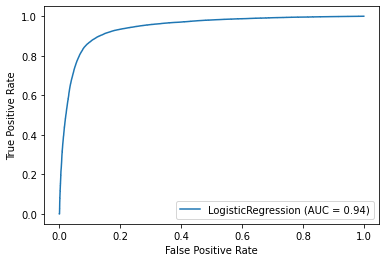

Logistic Regression score train:  0.8921451814250896
Logistic Regression score:  0.8916232178785453


In [18]:
metrics.plot_roc_curve(logit_loan, X_test, Y_test)
plt.show()                     
print("Logistic Regression score train: ", logit_loan.score(X_train, Y_train))
print("Logistic Regression score: ", logit_loan.score(X_test, Y_test))

We have an Area Under the Curve(AUC) of 94%.

### Confussion Matrix

In [23]:
from sklearn.metrics import plot_confusion_matrix

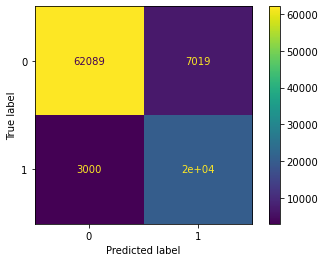

In [25]:
plot_confusion_matrix(logit_loan, X=X_test, y_true=Y_test)

The values of the main diagonal a=62089 and d=20000 correspond to the values estimated correctly by the model, both the true positive_ TP(d), and the true negative_TN (a).

The other diagonal, therefore, represents the cases in which the model "made a mistake" (c=3000 false negatives_FN, b=7019 false positives_FP).

### Saving the model

In [1]:
import pickle

In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
filename = 'logit_loan.sav'
pickle.dump(logit_loan, open(filename, 'wb'))

In [ ]:
logic_model = pickle.load(open('logit_loan.sav', 'rb'))
logic_model

In [ ]:
a = logic_model.score(X_test, Y_test)
print("Acurracy : " , a*100)